Compares the bins to single values

In [1]:
cd('../src/v2')

In [2]:
% Compare bins to single
pose = [39.3764, 11.3612, -1.1-pi/4];
gridresolution = 10


gridresolution =

    10




In [3]:
map  = LoadMap('../../Data/Vorgabe_Rundgang.png', 'resolution', gridresolution);

In [4]:
pose     = [39.3764 / 58.9 * map.XWorldLimits(2), 11.3612 / 36.6 * map.YWorldLimits(2), -1.1-pi/4]
minrange = 58.9 / map.XWorldLimits(2) * 0.5
maxrange = 58.9 / map.XWorldLimits(2) * 4


pose =

   39.3764   11.3612   -1.8854


minrange =

    0.5000


maxrange =

     4




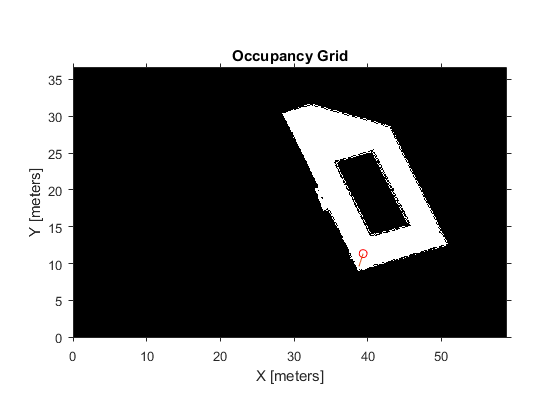

In [8]:
figure();
show(map);
hold on;
scatter(pose(1), pose(2), 'Or')
[u, v] = pol2cart(pose(3), 2);
quiver(pose(1), pose(2), u, v);

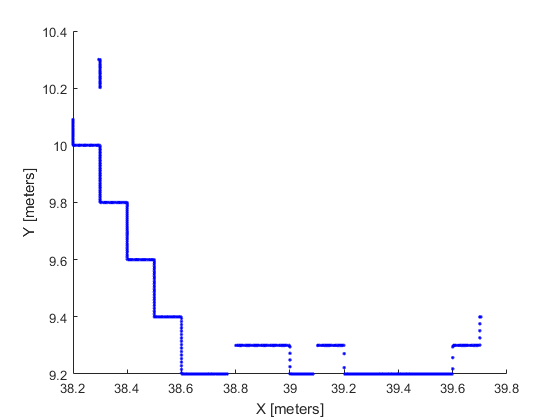

In [9]:
[thetas_all, rhos_all, x, y] = SimulateKinect(map, pose, 'anglesteps', 500, 'minrange', minrange, 'maxrange', maxrange);
scatter(x, y, '.b');
xlabel('X [meters]');
ylabel('Y [meters]');

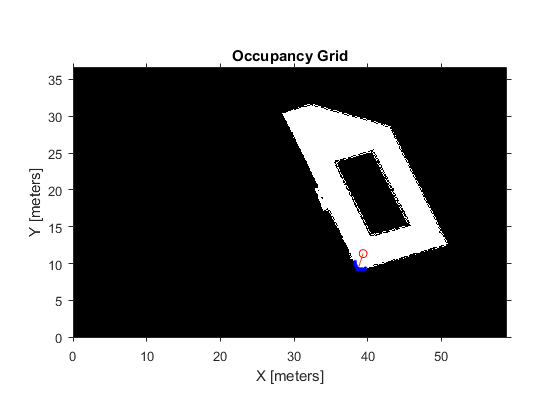

In [10]:
figure();
show(map);
hold on;
scatter(pose(1), pose(2), 'Or')
quiver(pose(1), pose(2), u, v);
scatter(x, y, '.b');

### Generate bins

In [11]:
numElements = 11;
semi_range  = 27.125 * pi / 180;
% thetaMin    = pi / 2 - semi_range;
% thetaMax    = pi / 2 + semi_range;
thetaMin    = min(thetas_all);
thetaMax    = max(thetas_all);
thetaDiff   = thetaMax - thetaMin;
thetas_bins = double(linspace(thetaMin, thetaMax, numElements)');
rhos_bins   = double(arrayfun(@(x) nanmedian(rhos_all(thetas_all > x & thetas_all < (x + thetaDiff / numElements))), thetas_bins));

### Simultate

In [12]:
[thetas_sim, rhos_sim] = SimulateKinect(map, pose, 'angles', thetas_bins);

In [13]:
theta_diff = thetas_bins - thetas_sim;

disp(['thetas_bins | thetas_sim | theta_diff']);
disp(table([thetas_bins, thetas_sim, theta_diff]));

thetas_bins | thetas_sim | theta_diff
                      Var1                   
    _________________________________________

          -0.48          -0.48              0
         -0.384         -0.384     2.2204e-16
         -0.288         -0.288      4.996e-16
         -0.192         -0.192     2.7756e-16
         -0.096         -0.096     1.6653e-15
    -1.8874e-15    -1.5543e-15    -3.3307e-16
          0.096          0.096     2.5535e-15
          0.192          0.192    -2.9976e-15
          0.288          0.288    -1.7764e-15
          0.384          0.384     -9.992e-16
           0.48           0.48              0




In [14]:
rhos_diff  =   rhos_bins - rhos_sim;

disp(['rhos_bins | rhos_sim | rhos_diff']);
disp(table([rhos_bins, rhos_sim, rhos_diff]));

rhos_bins | rhos_sim | rhos_diff
                    Var1                
    ____________________________________

    1.5784         1.5148       0.063618
    1.7738         1.7776     -0.0038651
     1.879          1.895      -0.015984
    2.0034         2.0123     -0.0089799
    2.1615          2.139       0.022542
    2.1395         2.2727       -0.13323
    2.1339         2.1114       0.022472
    2.1627         2.0768       0.085905
    2.1617          2.162    -0.00023749
    2.0849         2.1664       -0.08149
       NaN         1.9883            NaN




# Binary Occupancy grid

In [15]:
filepath = '../../Data/Vorgabe_Rundgang.png';

data_bin = imcomplement(imbinarize(rgb2gray(imread(filepath))));

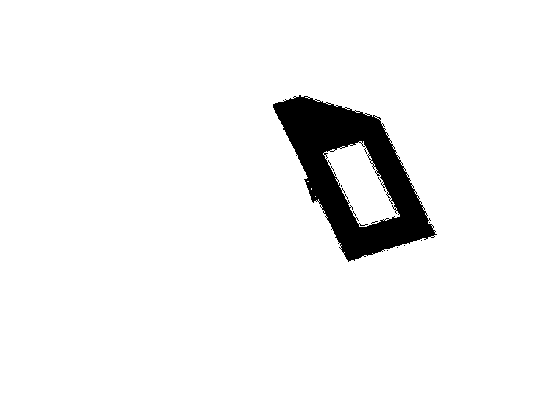

In [16]:
imshow(data_bin)

In [17]:
grid_bin = robotics.BinaryOccupancyGrid(data_bin, gridresolution);

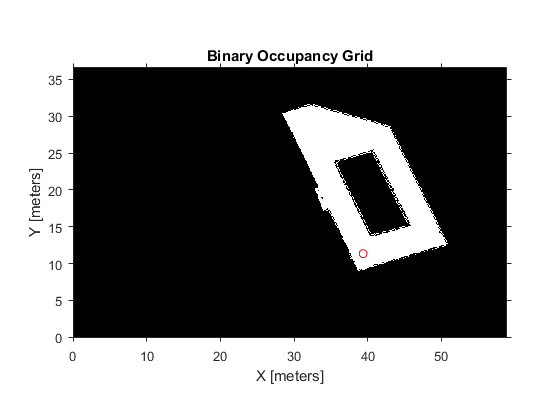

In [19]:
show(grid_bin)
hold on
scatter(pose(1), pose(2), 'Or');

In [15]:
[thetas_bg, rhos_bg] = SimulateKinect(grid_bin);

Undefined function or variable 'grid_bin'.



In [20]:
raycast(grid_bin, pose, maxrange, pose(3))

Undefined function 'raycast' for input arguments of type 'robotics.BinaryOccupancyGrid'.



In [25]:
grid_bin = robotics.OccupancyGrid(data_bin, gridresolution * 10, 'size', 0.1);


  File C:\Program Files\MATLAB\R2016b\toolbox\shared\coder\coder\+coder\+internal\errorIf.m, line 8, in errorIf

  File C:\Program Files\MATLAB\R2016b\toolbox\robotics\robotalgs\+robotics\+algs\+internal\OccupancyGridBase.m, line 472, in OccupancyGridBase.parseConstructorInputs

  File C:\Program Files\MATLAB\R2016b\toolbox\robotics\robotalgs\+robotics\OccupancyGrid.m, line 271, in OccupancyGrid.OccupancyGrid
Too many input arguments.



In [24]:
grid_bin


grid_bin = 

  OccupancyGrid with properties:

        OccupiedThreshold: 0.6500
            FreeThreshold: 0.2000
    ProbabilitySaturation: [0.0010 0.9990]
                 GridSize: [366 589]
               Resolution: 100
             XWorldLimits: [0 5.8900]
             YWorldLimits: [0 3.6600]
      GridLocationInWorld: [0 0]


